In [1]:
import tensorflow as tf

# Check if a GPU is available and print its name
if tf.test.gpu_device_name():
    print("GPU device found:", tf.test.gpu_device_name())
else:
    print("No GPU device found. Using CPU.")

No GPU device found. Using CPU.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
import env_module as em

In [4]:
grid_size = (5, 5)
num_service_nodes = 5
num_charging_stations = 3

# Define the state space
# State space: Flattened representation of (x, y) position of the UAV + battery level
state_space = 2  # Battery level can range from 0 to 100

# Define the action space
# Action space: Move Up, Move Down, Move Left, Move Right


epsilon = 0.8  # Initial exploration rate
epsilon_decay = 0.85  # Decay rate for exploration
gamma = 0.95  # Discount factor
batch_size = 32
num_episodes = 5

# Create the environment and DQN agent
env = em.GridWorldEnvironment(grid_size, num_service_nodes, num_charging_stations)

In [5]:
import numpy as np
import random
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [6]:
import dqn_module as dm

In [7]:
action_space = env.service_nodes + env.charging_stations
print(action_space)
agent = dm.DQNAgent(state_space, action_space)

[(3, 3), (4, 3), (4, 0), (0, 4), (0, 1), (4, 4), (2, 1), (1, 0)]


In [8]:
print(env.service_nodes)
print(env.charging_stations)

[(3, 3), (4, 3), (4, 0), (0, 4), (0, 1)]
[(4, 4), (2, 1), (1, 0)]


In [9]:
# Training loop
trajectory = []
episode_rewards = []  # List to store rewards for each episode

for episode in range(num_episodes):
    state = env.reset()
    print(state)
    total_reward = 0
    done = False
    print(env.copy_service_nodes)

    while not done:
        print(len(env.copy_service_nodes))
        if episode == num_episodes - 1:
            trajectory.append(env.uav_position)
        action = agent.select_action(state)
        next_state, reward, done = env.step(action)
        agent.train(state, action, reward, next_state, done)
        total_reward += reward
        state = next_state

    epsilon *= epsilon_decay
    episode_rewards.append(total_reward)  # Store the total reward for the episode
    print(f"Episode {episode + 1}/{num_episodes}, Total Reward: {total_reward}")

(0, 0)
[(3, 3), (4, 3), (4, 0), (0, 4), (0, 1)]
5
4
1/1 [==============================] - 0s 49ms/step
3
2
2
1/1 [==============================] - 0s 33ms/step
2
1/1 [==============================] - 0s 23ms/step
2
1/1 [==============================] - 0s 25ms/step
2
1
1/1 [==============================] - 0s 24ms/step
1
1
1/1 [==============================] - 0s 33ms/step
1
1
1
1
1
1
1
1
1
1
0
Episode 1/5, Total Reward: 170
(0, 0)
[(3, 3), (4, 3), (4, 0), (0, 4), (0, 1)]
5
4
3
3
2
1
1
0
Episode 2/5, Total Reward: 785
(0, 0)
[(3, 3), (4, 3), (4, 0), (0, 4), (0, 1)]
5
5
1/1 [==============================] - 0s 23ms/step
4
1/1 [==============================] - 0s 33ms/step
3
1/1 [==============================] - 0s 15ms/step
3
1/1 [==============================] - 0s 32ms/step
3
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 30ms/step
3
1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 34ms/step
3
1/1 [==============================] - 0s 28ms/step
3
1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step
3
1/1 [==============================] - 0s 26ms/step
3
1/1 [==============================] - 0s 23ms/step
3
1/1 [==============================] - 0s 30ms/step
3
1/1 [==============================] - 0s 18ms/step
3
1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 31ms/step
3
1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 23ms/step
3
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 25ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 14ms/step
2
1/1 [==============================] - 0s 23ms/step
2
1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 35ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 34ms/step
2
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 41ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 28ms/step
2
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 33ms/step
2
1/1 [==============================] - 0s 17ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 32ms/step
2
1/1 [==============================] - 0s 32ms/step
1
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 21ms/step
1
1/1 [==============================] - 0s 35ms/step
1
1/1 [==============================] - 0s 25ms/step
1
1/1 [==============================] - 0s 24ms/step
1
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 33ms/step
1
1/1 [==============================] - 0s 33ms/step
1
1/1 [==============================] - 0s 16ms/step
1
1/1 [==============================] - 0s 37ms/step
1
1/1 [==============================] - 0s 33ms/step
1
1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 17ms/step
1
1/1 [==============================] - 0s 35ms/step
1
1/1 [==============================] - 0s 16ms/step
1
1/1 [==============================] - 0s 31ms/step
1
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step
1
1/1 [==============================] - 0s 38ms/step
1
1/1 [==============================] - 0s 16ms/step
1
1/1 [==============================] - 0s 31ms/step
1
1/1 [==============================] - 0s 16ms/step
1
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step
1
1/1 [==============================] - 0s 39ms/step
1
1/1 [==============================] - 0s 31ms/step
1
1/1 [==============================] - 0s 26ms/step
1
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 35ms/step
1
1/1 [==============================] - 0s 34ms/step
1
1/1 [==============================] - 0s 32ms/step
1
1/1 [==============================] - 0s 25ms/step
1
1/1 [==============================] - 0s 16ms/step
1
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 23ms/step
1
1/1 [==============================] - 0s 32ms/step
1
1/1 [==============================] - 0s 31ms/step
1
1/1 [==============================] - 0s 14ms/step
1
1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 11ms/step
1
1/1 [==============================] - 0s 16ms/step
1
1/1 [==============================] - 0s 16ms/step
1
1/1 [==============================] - 0s 31ms/step
1
1/1 [==============================] - 0s 16ms/step
1
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step
1
1/1 [==============================] - 0s 27ms/step
0
1/1 [==============================] - 0s 19ms/step
Episode 3/5, Total Reward: -29790
(0, 0)
[(3, 3), (4, 3), (4, 0), (0, 4), (0, 1)]
5
1/1 [==============================] - 0s 23ms/step
5
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step
4
1/1 [==============================] - 0s 23ms/step
4
1/1 [==============================] - 0s 31ms/step
4
1/1 [==============================] - 0s 31ms/step
4
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 28ms/step
3
1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 34ms/step
3
1/1 [==============================] - 0s 31ms/step
3
1/1 [==============================] - 0s 31ms/step
3
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 17ms/step
3
1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 17ms/step
3
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step
3
1/1 [==============================] - 0s 17ms/step
3
1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 17ms/step
3
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step
3
1/1 [==============================] - 0s 23ms/step
3
1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 24ms/step
3
1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 31ms/step
3
1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 28ms/step
2
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 28ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 13ms/step
2
1/1 [==============================] - 0s 24ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 12ms/step
2
1/1 [==============================] - 0s 17ms/step
2
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 41ms/step
2
1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 24ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 19ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 27ms/step
2
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 41ms/step
2
1/1 [==============================] - 0s 18ms/step
2
1/1 [==============================] - 0s 30ms/step
2
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 22ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 15ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 23ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 34ms/step
2
1/1 [==============================] - 0s 26ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 34ms/step
2
1/1 [==============================] - 0s 29ms/step
2
1/1 [==============================] - 0s 32ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 33ms/step
2
1/1 [==============================] - 0s 38ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 23ms/step
2
1/1 [==============================] - 0s 23ms/step
2
1/1 [==============================] - 0s 38ms/step
2
1/1 [==============================] - 0s 9ms/step
2
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 22ms/step
2
1/1 [==============================] - 0s 12ms/step
1
1/1 [==============================] - 0s 31ms/step
1
1/1 [==============================] - 0s 14ms/step
1
1/1 [==============================] - 0s 35ms/step
1
1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 31ms/step
1
1/1 [==============================] - 0s 24ms/step
1
1/1 [==============================] - 0s 31ms/step
1
1/1 [==============================] - 0s 31ms/step
1
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 41ms/step
1
1/1 [==============================] - 0s 31ms/step
1
1/1 [==============================] - 0s 17ms/step
1
1/1 [==============================] - 0s 16ms/step
1
1/1 [==============================] - 0s 23ms/step
1
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
1
1/1 [==============================] - 0s 16ms/step
1
1/1 [==============================] - 0s 19ms/step
1
1/1 [==============================] - 0s 36ms/step
1
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 31ms/step
0
1/1 [==============================] - 0s 32ms/step
Episode 4/5, Total Reward: -73685
(0, 0)
[(3, 3), (4, 3), (4, 0), (0, 4), (0, 1)]
5
1/1 [==============================] - 0s 18ms/step
4
1/1 [==============================] - 0s 34ms/step
3
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 23ms/step
3
1/1 [==============================] - 0s 17ms/step
3
1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 31ms/step
3
1/1 [==============================] - 0s 34ms/step
3
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 34ms/step
3
1/1 [==============================] - 0s 17ms/step
3
1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 31ms/step
3
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step
3
1/1 [==============================] - 0s 31ms/step
3
1/1 [==============================] - 0s 31ms/step
3
1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 17ms/step
3
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step
3
1/1 [==============================] - 0s 31ms/step
3
1/1 [==============================] - 0s 34ms/step
3
1/1 [==============================] - 0s 31ms/step
3
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 34ms/step
3
1/1 [==============================] - 0s 31ms/step
3
1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 31ms/step
3
1/1 [==============================] - 0s 26ms/step
3
1/1 [==============================] - 0s 23ms/step
3
1/1 [==============================] - 0s 19ms/step
3
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 31ms/step
3
1/1 [==============================] - 0s 23ms/step
3
1/1 [==============================] - 0s 23ms/step
2
1/1 [==============================] - 0s 19ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 22ms/step
2
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 34ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 32ms/step
2
1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 37ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 18ms/step
2
1/1 [==============================] - 0s 32ms/step
2
1/1 [==============================] - 0s 33ms/step
2
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 11ms/step
2
1/1 [==============================] - 0s 24ms/step
2
1/1 [==============================] - 0s 27ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 33ms/step
2
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 22ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 33ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 20ms/step
2
1/1 [==============================] - 0s 26ms/step
2
1/1 [==============================] - 0s 24ms/step
2
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 22ms/step
2
1/1 [==============================] - 0s 25ms/step
2
1/1 [==============================] - 0s 39ms/step
2
1/1 [==============================] - 0s 18ms/step
2
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step
2
1/1 [==============================] - 0s 33ms/step
2
1/1 [==============================] - 0s 23ms/step
2
1/1 [==============================] - 0s 24ms/step
2
1/1 [==============================] - 0s 23ms/step
2
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 17ms/step
2
1/1 [==============================] - 0s 27ms/step
2
1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step
2
1/1 [==============================] - 0s 23ms/step
2
1/1 [==============================] - 0s 24ms/step
2
1/1 [==============================] - 0s 33ms/step
2
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 24ms/step
2
1/1 [==============================] - 0s 23ms/step
2
1/1 [==============================] - 0s 23ms/step
2
1/1 [==============================] - 0s 33ms/step
2
1/1 [==============================] - 0s 17ms/step
2
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 23ms/step
2
1/1 [==============================] - 0s 17ms/step
2
1/1 [==============================] - 0s 23ms/step
2
1/1 [==============================] - 0s 33ms/step
2
1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 23ms/step
2
1/1 [==============================] - 0s 30ms/step
2
1/1 [==============================] - 0s 25ms/step
2
1/1 [==============================] - 0s 17ms/step
2
1/1 [==============================] - 0s 16ms/step
2


1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 34ms/step
2
1/1 [==============================] - 0s 17ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 23ms/step
2
1/1 [==============================] - 0s 59ms/step
2
1/1 [==============================] - 0s 36ms/step
2
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step
2
1/1 [==============================] - 0s 47ms/step
2
1/1 [==============================] - 0s 42ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 35ms/step
2
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 33ms/step
2
1/1 [==============================] - 0s 12ms/step
2
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 22ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 28ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 24ms/step
2
1/1 [==============================] - 0s 35ms/step
2
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 24ms/step
2
1/1 [==============================] - 0s 33ms/step
2
1/1 [==============================] - 0s 20ms/step
2
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 33ms/step
2
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 32ms/step
2


1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 28ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 25ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 33ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 25ms/step
2
1/1 [==============================] - 0s 22ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - ETA: 0s

In [11]:
print(env.service_nodes)
print(env.copy_service_nodes)
print(env.charging_stations)
print(env.battery)
print(env.uav_position)
print(trajectory)
print(episode_rewards)

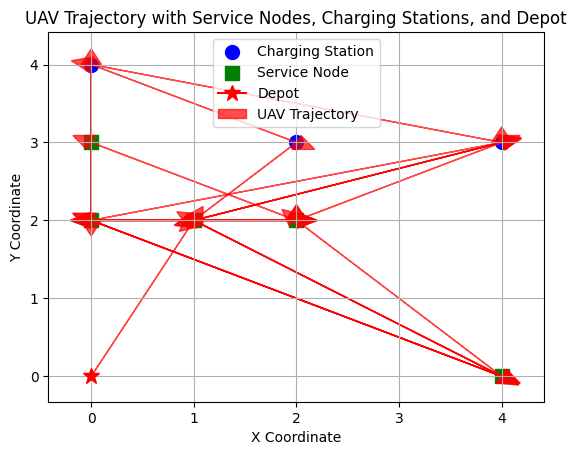

In [11]:
# Separate the x and y coordinates from the trajectory
x_trajectory, y_trajectory = zip(*trajectory)

# Separate the x and y coordinates from service nodes and charging stations
x_service_nodes, y_service_nodes = zip(*env.service_nodes)
x_charging_stations, y_charging_stations = zip(*env.charging_stations)

# Create a scatter plot of charging stations
plt.scatter(x_charging_stations, y_charging_stations, marker='o', label='Charging Station', color='blue', s=100)

# Create a scatter plot of service nodes
plt.scatter(x_service_nodes, y_service_nodes, marker='s', label='Service Node', color='green', s=100)

# Plot the depot (starting point) as a red star
plt.plot(*env.depot, marker='*', markersize=12, label='Depot', color='red')

# Create arrows to represent the UAV's trajectory
for i in range(len(trajectory) - 1):
    dx = x_trajectory[i + 1] - x_trajectory[i]
    dy = y_trajectory[i + 1] - y_trajectory[i]
    plt.arrow(
        x_trajectory[i],
        y_trajectory[i],
        dx,
        dy,
        head_width=0.2,
        head_length=0.2,
        fc='red',
        ec='red',
        alpha=0.7,
        label='UAV Trajectory' if i == 0 else None,
    )

# Add labels and a legend
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('UAV Trajectory with Service Nodes, Charging Stations, and Depot_Double_Q_Learning')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

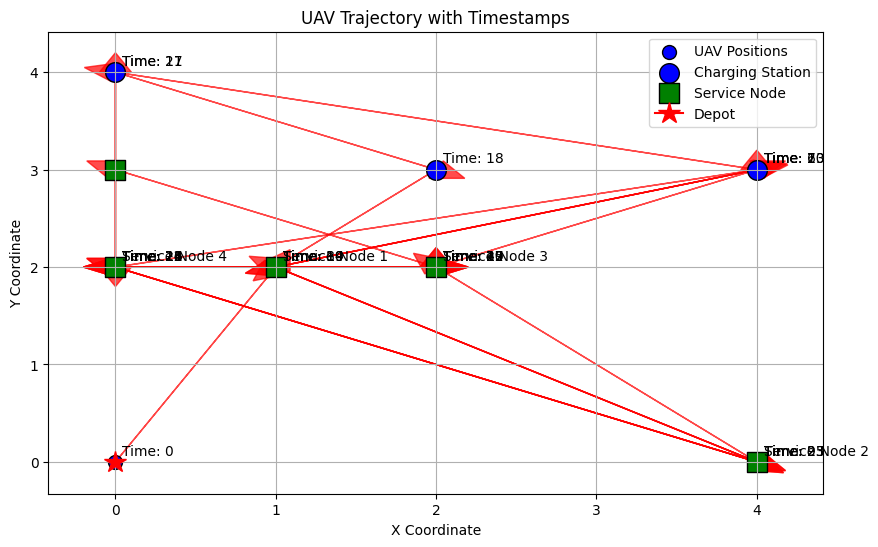

Animation saved as uav_trajectory_high_quality.gif


In [12]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size for better visibility

# Create empty lists to store arrow objects and text objects
arrows = []
timestamps = []

def update(frame):
    ax.clear()

    x_trajectory, y_trajectory = zip(*trajectory[:frame + 1])

    # Create arrows to represent the UAV's trajectory with timestamps
    valid_positions = []  # List to store valid UAV positions
    visited_service_nodes = set()  # Set to keep track of visited service nodes

    for i in range(len(x_trajectory) - 1):
        x, y = x_trajectory[i], y_trajectory[i]
        dx, dy = x_trajectory[i + 1] - x_trajectory[i], y_trajectory[i + 1] - y_trajectory[i]

        timestamp = f"Time: {i}"

        if (x, y) not in valid_positions:
            valid_positions.append((x, y))

        # Check if the current position is a service node and it has not been visited yet
        if (x, y) in env.service_nodes and (x, y) not in visited_service_nodes:
            visited_service_nodes.add((x, y))  # Mark the service node as visited
            text = ax.annotate(
                f"Service Node {len(visited_service_nodes)}",
                xy=(x, y),
                xytext=(5, 5),  # Offset from the arrow's tail
                textcoords='offset points',
                fontsize=10,  # Increase font size
                color='black',
            )
        else:
            text = ax.annotate(
                timestamp,
                xy=(x, y),
                xytext=(5, 5),  # Offset from the arrow's tail
                textcoords='offset points',
                fontsize=10,  # Increase font size
                color='black',
            )

        arrow = ax.arrow(
            x, y, dx, dy, head_width=0.2, head_length=0.2, fc='red', ec='red', alpha=0.7,
        )

        arrows.append(arrow)
        timestamps.append(text)

    # Check if there are valid positions to plot
    if valid_positions:
        # Create a scatter plot of valid UAV positions as blue circles
        valid_x, valid_y = zip(*valid_positions)
        ax.scatter(valid_x, valid_y, marker='o', s=100, label='UAV Positions', color='blue', edgecolors='black')

    # Create scatter plots for charging stations and service nodes
    charging_x, charging_y = zip(*env.charging_stations)
    service_x, service_y = zip(*env.service_nodes)

    ax.scatter(charging_x, charging_y, marker='o', s=200, label='Charging Station', color='blue', edgecolors='black')
    ax.scatter(service_x, service_y, marker='s', s=200, label='Service Node', color='green', edgecolors='black')

    # Create a scatter plot of the depot (starting point)
    ax.plot(*env.depot, marker='*', markersize=16, label='Depot', color='red')

    # Add labels and a legend
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title('UAV Trajectory with Timestamps__Double_Q_Learning')
    ax.legend()

    plt.grid(True)

    return arrows + timestamps  # Return a list of artists

# Create the animation
ani = FuncAnimation(fig, update, frames=len(trajectory), repeat=False, blit=True, interval=500)

# Save the animation as a GIF
filename = 'uav_trajectory__Double_Q_Learning.gif'
ani.save(filename, writer='pillow')

# Show the animation (optional)
plt.show()

print(f"Animation saved as {filename}")

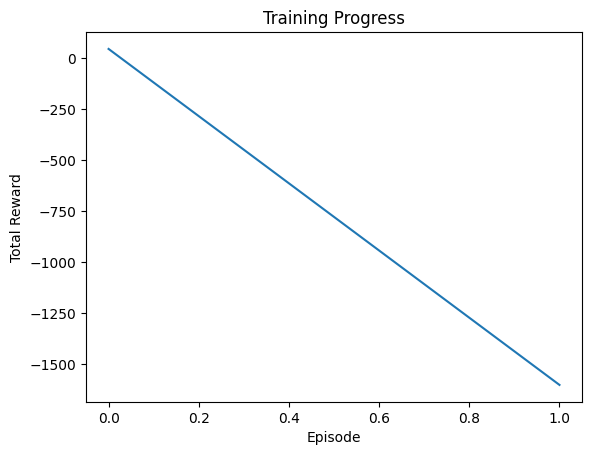

In [13]:
# Plotting the rewards
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Training Progress')
plt.show()